In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api
import ISLP.models
import scipy.stats

# 使用协方差进行线性回归

## 概述

本 Jupyter Notebook 将深入探讨如何使用协方差矩阵进行线性回归。通过本节内容，您将学会如何通过协方差和方差计算来实现线性回归。具体而言，您将会：

- 理解并使用协方差矩阵：
通过计算 `lstat` 和 `medv` 变量之间的协方差，以及 `lstat` 的方差，得出回归线的斜率和截距。

- 通过协方差方法推导预测值（`y_hat_cov`）

- 可视化和对比结果：
将数据点与通过设计矩阵方法和协方差方法获得的回归线一同绘制。
对比结果以展示两种方法得到相同的回归线。

## 加载数据

和之前一样，我们将使用 “Boston” 示例数据集。

In [13]:
data_boston = ISLP.load_data("Boston")

## 总结：使用设计矩阵进行线性回归

线性回归模型用于描述因变量（`medv`）与一个或多个自变量（如 `lstat`）之间的关系。该关系使用设计矩阵 \($X$\) 表示，其中包含所有自变量和一个截距项。对于一个简单的线性回归模型（仅一个自变量 `lstat`），设计矩阵可以构建如下：

$$
X = \begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
\vdots & \vdots \\
1 & x_{n} \\
\end{bmatrix}
$$

In [ ]:
lstat = data_boston["lstat"]
x_matrix = pd.DataFrame({"intercept": np.ones(lstat.shape[0]), "lstat": lstat})

线性回归模型可以用矩阵形式表示为：

$$\mathbf{y} = X \mathbf{\beta} + \mathbf{\epsilon} $$

In [ ]:
medv = data_boston["medv"]

y = medv
model = statsmodels.api.OLS(y, x_matrix)

系数 \($\mathbf{\beta}$\) 使用普通最小二乘法（OLS）进行估计，OLS 方法通过最小化残差平方和来求解。OLS 估计器的公式为：

$$\mathbf{\hat{\beta}} = (X^T X)^{-1} X^T \mathbf{y} $$

利用估计得到的系数 \($\mathbf{\hat{\beta}}$\)，可以对新数据点进行预测：

$$\mathbf{\hat{y}} = X \mathbf{\hat{\beta}} $$

其中，\($\mathbf{\hat{y}}$\) 是 `medv` 的预测值向量。

In [16]:
results = model.fit()
beta_hat = results.params
y_hat = x_matrix @ beta_hat

# 协方差方法

另外，对于具有一个自变量的简单线性回归，\($\mathbf{\hat{\beta}}$\) 也可以通过协方差和方差计算得出：

- **斜率 \($\hat{\beta}_1$\)**:
  $$
  \hat{\beta}_1 = \frac{\text{Cov}(X, y)}{\text{Var}(X)}
  $$
  其中：
  - \($\text{Cov}(X, y)$\) 是自变量 \($X$\)（即 `lstat`）和因变量 \($y$\)（即 `medv`）之间的协方差。
  - \($\text{Var}(X)$\) 是自变量 \($X$\) 的方差。

- **截距 \($\hat{\beta}_0$\)**:
  
  $$
  \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{X}
  $$

  其中：
  - \($\bar{y}$\) 是因变量 \($y$\) 的平均值。
  - \($\bar{X}$\) 是自变量 \($X$\) 的平均值。

### 实现
我们使用 Numpy 库来计算协方差矩阵：

In [17]:
covariance = np.cov(lstat, medv, ddof=0)

#### 自由度 (`ddof`) 在方差和协方差计算中的说明

在统计计算中，`ddof`（"delta degrees of freedom"）表示“自由度偏差”，它是 `numpy.cov` 和 `numpy.var` 等函数中的一个参数，用于调整方差和协方差计算中的分母（通过减少自由度来实现）。

#### 自由度 (`ddof`)

- **`ddof=0`**：  
  - 用于 **总体统计**。
  - **方差**：假设您在计算总体方差，因此不对样本偏差进行修正。
  - **协方差**：假设数据覆盖整个总体，因此不需要进行偏差修正。

- **`ddof=1`**：  
  - 用于 **样本统计**。
  - **方差**：在使用总体的样本来估计方差时进行偏差修正，这种调整称为贝塞尔修正（Bessel's correction）。
  - **协方差**：在使用总体的样本来估计协方差时进行偏差修正。

#### 方差计算

- **总体方差**（使用 `ddof=0`）：
  $$
  \text{Var}(X) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
  $$

- **样本方差**（使用 `ddof=1`）：
  $$
  \text{Var}(X) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
  $$

#### 协方差计算

- **总体协方差**（使用 `ddof=0`）：
  $$
  \text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
  $$

- **样本协方差**（使用 `ddof=1`）：
  $$
  \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
  $$

### 结论

由于我们在计算中使用的是整体数据，因此选择 `ddof=0`，假设不需要偏差修正。

#### 协方差矩阵

**协方差矩阵** 是多变量统计中的关键概念，用于描述数据集中变量对之间的协方差。对于具有多个变量的数据集，协方差矩阵是一个方阵，每个元素表示一对变量之间的协方差关系：

$$
\text{Cov}(X) = \begin{bmatrix}
\text{Var}(X_1) & \text{Cov}(X_1, X_2) & \cdots & \text{Cov}(X_1, X_p) \\
\text{Cov}(X_2, X_1) & \text{Var}(X_2) & \cdots & \text{Cov}(X_2, X_p) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(X_p, X_1) & \text{Cov}(X_p, X_2) & \cdots & \text{Var}(X_p)
\end{bmatrix}
$$

其中：
- \($\text{Var}(X_i)$\) 表示变量 \($X_i$\) 的方差，相当于 \($\text{Cov}(X_i, X_i)$\)。
- \($\text{Cov}(X_i, X_j)$\) 表示变量 \($X_i$\) 和 \($X_j$\) 之间的协方差。

协方差矩阵对理解多个变量之间的关系非常有用，可以帮助判断变量是如何一起变化的，这也是主成分分析（Principal Component Analysis, PCA）等技术的基础。

我们感兴趣的是协方差矩阵中 `lstat`（索引 $0$，对应第一行）与 `medv`（索引 $1$，对应第二列）之间的协方差：

In [18]:
cov_lstat_medv = covariance[0, 1]

因此，`lstat` 的方差为：

In [19]:
var_lstat = covariance[0, 0]

现在，我们可以计算斜率 \($\beta_1$\) 和截距 \($\beta_0$\)

In [20]:
beta1 = cov_lstat_medv / var_lstat

mean_lstat = np.mean(lstat)
mean_medv = np.mean(medv)
beta0 = mean_medv - beta1 * mean_lstat

使用协方差方法计算得到的 \($\hat{y}_{\text{cov}}$\) 为：

In [21]:
y_hat_cov = beta0 + beta1 * lstat

我们将使用蓝色虚线绘制 \($\hat{y}_{\text{cov}}$\) 并叠加在 \($\hat{y}$\) 上，以展示它们的结果相同：

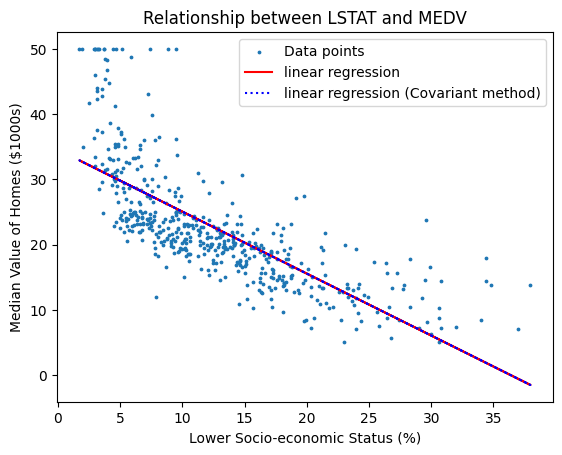

In [ ]:
plt.scatter(
    lstat,
    medv,
    s=3,
    label="Data points",
)

plt.plot(
    lstat,
    y_hat,
    "r",
    label="linear regression",
)
plt.plot(
    lstat,
    y_hat_cov,
    "b:",
    label="linear regression (Covariant method)",
)
plt.xlabel("Lower Socio-economic Status (%)")
plt.ylabel("Median Value of Homes ($1000s)")
plt.title("Relationship between LSTAT and MEDV")
plt.legend()
plt.show()

在本次讲解中，我们仅使用了协方差矩阵中的两个元素。请思考矩阵中的其他元素代表什么，以及它们提供了哪些信息。